In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/heart+disease.zip


Archive:  /content/drive/MyDrive/heart+disease.zip
  inflating: Index                   
  inflating: WARNING                 
  inflating: ask-detrano             
  inflating: bak                     
  inflating: cleve.mod               
  inflating: cleveland.data          
   creating: costs/
  inflating: costs/Index             
  inflating: costs/heart-disease.README  
  inflating: costs/heart-disease.cost  
  inflating: costs/heart-disease.delay  
  inflating: costs/heart-disease.expense  
  inflating: costs/heart-disease.group  
  inflating: heart-disease.names     
  inflating: hungarian.data          
  inflating: long-beach-va.data      
  inflating: new.data                
  inflating: processed.cleveland.data  
  inflating: processed.hungarian.data  
  inflating: processed.switzerland.data  
  inflating: processed.va.data       
  inflating: reprocessed.hungarian.data  
  inflating: switzerland.data        


# Task
Implement the k-Means clustering algorithm from scratch, apply it to at least three real-world datasets from the UCI Machine Learning Repository (starting with "heart+disease.zip"), evaluate the clustering performance by calculating average intra-cluster and inter-cluster Euclidean distances for two chosen clusters, and visualize the clusters for each dataset using k=4 , k=5 and k=3

In [6]:
import pandas as pd

# Define the column names based on the heart-disease.names file
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the data into a pandas DataFrame
df_cleveland = pd.read_csv('processed.cleveland.data', names=column_names, na_values='?')

# Display the first 5 rows of the DataFrame
display(df_cleveland.head())

# Display the data types of each column
display(df_cleveland.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


None

## Preprocess the data



In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Handle missing values
df_cleveland['ca'] = df_cleveland['ca'].replace('?', np.nan).astype(float)
df_cleveland['thal'] = df_cleveland['thal'].replace('?', np.nan).astype(float)
df_cleveland['ca'].fillna(df_cleveland['ca'].mean(), inplace=True)
df_cleveland['thal'].fillna(df_cleveland['thal'].mean(), inplace=True)

# Separate features and target variable
X = df_cleveland.drop('target', axis=1)
y = df_cleveland['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Store processed features in a DataFrame
df_cleveland_processed = pd.DataFrame(X_scaled, columns=X.columns)

display(df_cleveland_processed.head())

/tmp/ipython-input-7-3182830383.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleveland['ca'].fillna(df_cleveland['ca'].mean(), inplace=True)
/tmp/ipython-input-7-3182830383.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522


## Implement k-means from scratch




In [8]:
import numpy as np

def initialize_centroids(data, k):
    """Initializes centroids by randomly selecting k data points."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_to_clusters(data, centroids):
    """Assigns each data point to the closest centroid."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, assignments, k):
    """Updates centroids by calculating the mean of data points in each cluster."""
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[assignments == i]
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)
        else:
            # Handle empty clusters by re-initializing the centroid
            new_centroids[i] = data[np.random.choice(data.shape[0])]
    return new_centroids

def kmeans(data, k, max_iterations=100, tolerance=1e-4):
    """
    Performs k-Means clustering.

    Args:
        data (np.ndarray): The input data.
        k (int): The number of clusters.
        max_iterations (int): The maximum number of iterations.
        tolerance (float): The tolerance for convergence.

    Returns:
        tuple: A tuple containing the final centroids and cluster assignments.
    """
    data_np = data.values if isinstance(data, pd.DataFrame) else data
    centroids = initialize_centroids(data_np, k)
    for i in range(max_iterations):
        assignments = assign_to_clusters(data_np, centroids)
        new_centroids = update_centroids(data_np, assignments, k)
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break
        centroids = new_centroids
    return centroids, assign_to_clusters(data_np, centroids)


## Apply k-means to the datasets


In [9]:
centroids_cleveland, assignments_cleveland = kmeans(df_cleveland_processed, k=4)

## Evaluate clustering performance



In [10]:
import numpy as np

def calculate_intra_cluster_distance(data, assignments, centroids, cluster_id):
    """Calculates the average Euclidean distance between points and their centroid in a cluster."""
    cluster_points = data[assignments == cluster_id]
    if len(cluster_points) == 0:
        return 0.0
    centroid = centroids[cluster_id]
    distances = np.sqrt(((cluster_points - centroid)**2).sum(axis=1))
    return np.mean(distances)

def calculate_inter_cluster_distance(centroid1, centroid2):
    """Calculates the Euclidean distance between two centroids."""
    return np.sqrt(((centroid1 - centroid2)**2).sum())

# Choose two clusters to evaluate
cluster1_id = 0
cluster2_id = 1

# Calculate average intra-cluster distances
avg_intra_distance_cluster1 = calculate_intra_cluster_distance(df_cleveland_processed.values, assignments_cleveland, centroids_cleveland, cluster1_id)
avg_intra_distance_cluster2 = calculate_intra_cluster_distance(df_cleveland_processed.values, assignments_cleveland, centroids_cleveland, cluster2_id)

# Calculate inter-cluster distance
inter_distance_clusters = calculate_inter_cluster_distance(centroids_cleveland[cluster1_id], centroids_cleveland[cluster2_id])

# Print the results
print(f"Average intra-cluster distance for Cluster {cluster1_id}: {avg_intra_distance_cluster1:.4f}")
print(f"Average intra-cluster distance for Cluster {cluster2_id}: {avg_intra_distance_cluster2:.4f}")
print(f"Inter-cluster distance between Cluster {cluster1_id} and Cluster {cluster2_id}: {inter_distance_clusters:.4f}")

Average intra-cluster distance for Cluster 0: 3.3064
Average intra-cluster distance for Cluster 1: 2.6624
Inter-cluster distance between Cluster 0 and Cluster 1: 2.7812


## Visualize the clusters


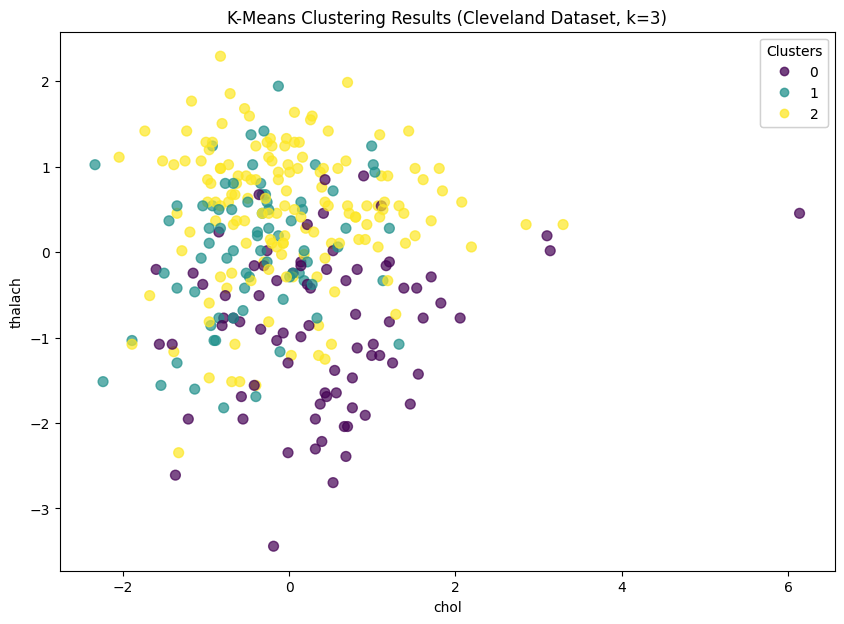

In [14]:
# Apply k-means with k=3
centroids_cleveland_k3, assignments_cleveland_k3 = kmeans(df_cleveland_processed, k=3)

# Visualize clusters for k=3
plt.figure(figsize=(10, 7))
scatter_k3 = plt.scatter(df_cleveland_processed.iloc[:, feature1_index],
                         df_cleveland_processed.iloc[:, feature2_index],
                         c=assignments_cleveland_k3,
                         cmap='viridis',
                         s=50,
                         alpha=0.7)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-Means Clustering Results (Cleveland Dataset, k=3)')
legend_k3 = plt.legend(*scatter_k3.legend_elements(), title="Clusters")
plt.gca().add_artist(legend_k3)
plt.show()

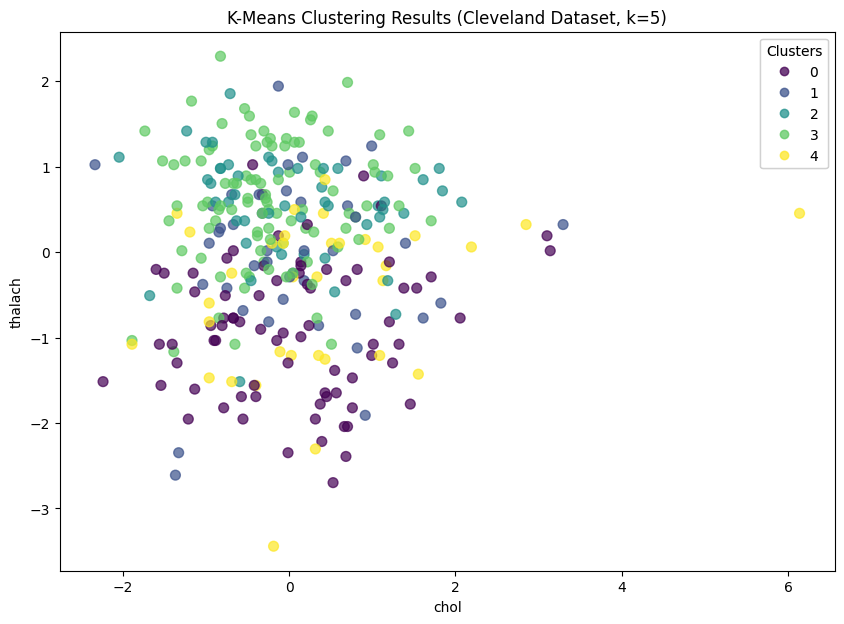

In [15]:
# Apply k-means with k=5
centroids_cleveland_k5, assignments_cleveland_k5 = kmeans(df_cleveland_processed, k=5)

# Visualize clusters for k=5
plt.figure(figsize=(10, 7))
scatter_k5 = plt.scatter(df_cleveland_processed.iloc[:, feature1_index],
                         df_cleveland_processed.iloc[:, feature2_index],
                         c=assignments_cleveland_k5,
                         cmap='viridis',
                         s=50,
                         alpha=0.7)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-Means Clustering Results (Cleveland Dataset, k=5)')
legend_k5 = plt.legend(*scatter_k5.legend_elements(), title="Clusters")
plt.gca().add_artist(legend_k5)
plt.show()

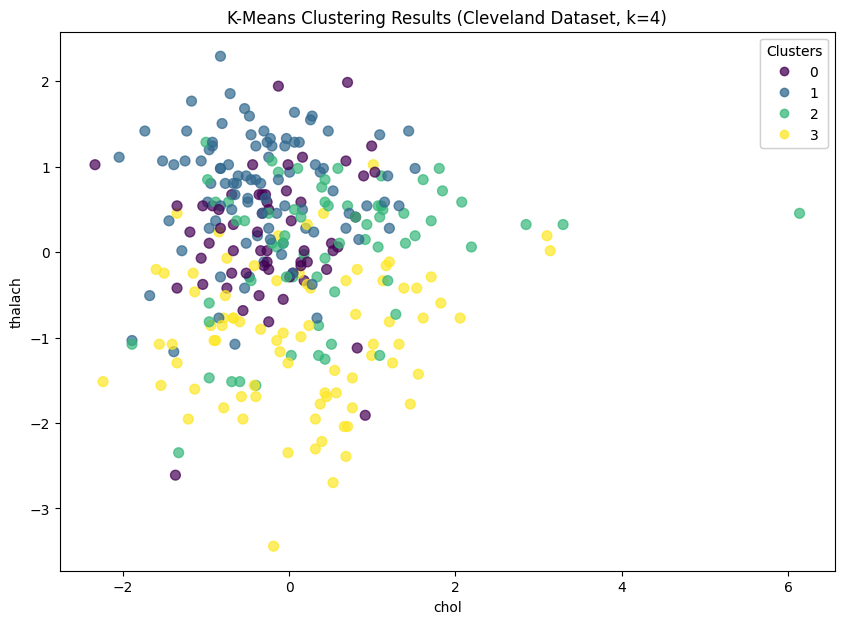

In [16]:
import matplotlib.pyplot as plt

# Select two features for visualization (e.g., 'chol' and 'thalach')
feature1 = 'chol'
feature2 = 'thalach'

# Get the column indices for the selected features
feature1_index = df_cleveland_processed.columns.get_loc(feature1)
feature2_index = df_cleveland_processed.columns.get_loc(feature2)

# Create the scatter plot for k=4
plt.figure(figsize=(10, 7))
scatter_k4 = plt.scatter(df_cleveland_processed.iloc[:, feature1_index],
                         df_cleveland_processed.iloc[:, feature2_index],
                         c=assignments_cleveland, # assignments_cleveland was generated with k=4
                         cmap='viridis',
                         s=50,
                         alpha=0.7)

# Add labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-Means Clustering Results (Cleveland Dataset, k=4)')

# Create a legend
legend_k4 = plt.legend(*scatter_k4.legend_elements(), title="Clusters")
plt.gca().add_artist(legend_k4)

# Display the plot
plt.show()